<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
## <font color='blue'>Deep Learning Para Aplicações de Inteligência Artificial com Python e C++</font>
## <font color='blue'>Compreendendo a Arquitetura Transformers</font>

In [2]:
# Imports
import matplotlib.pyplot as plt

https://www.deeplearningbook.com.br/

https://arxiv.org/abs/1706.03762

## Visão Geral da Arquitetura Transformers

Os Transformers estão em evidência e por um bom motivo. Eles conquistaram o mundo nos últimos anos. 

O Transformer é uma arquitetura que usa Atenção para melhorar significativamente o desempenho de modelos cujo objetivo é o aprendizado de sequências. 

A arquitetura foi apresentada pela primeira vez no artigo "Atenção é tudo que você precisa" de 2017 e foi rapidamente estabelecida como a arquitetura principal para a maioria das aplicações de IA.

Desde então, vários projetos, incluindo o BERT do Google e a série GPT da OpenAI, basearam-se nesta arquitetura e publicaram resultados incríveis de desempenho que superaram facilmente os benchmarks de última geração existentes.

A imagem abaixo ilustra a arquitetura Transformer padrão.

<img src="imagens/transformer_imagem01.png"  style="width: 370px;"/>

## Stack de Encoders e Decoders

Em sua essência, a arquitetura Transformers contém uma pilha de camadas codificadoras e camadas decodificadoras. Para evitar confusão, nos referiremos à camada individual como Codificador ou Decodificador e usaremos a pilha do codificador ou a pilha do decodificador para um grupo de camadas do codificador.

A pilha do codificador e a pilha do decodificador têm, cada uma, suas camadas de incorporação (embedding) correspondentes para suas respectivas entradas. Finalmente, existe uma camada de saída para gerar a saída final.

<img src="imagens/transformer_imagem02.jpeg"  style="width: 370px;"/>

Todos os codificadores são idênticos entre si. Da mesma forma, todos os decodificadores são idênticos.

O codificador contém a importante camada de autoatenção que calcula o relacionamento entre as diferentes palavras na sequência, bem como uma camada de feed-forward.

O Decodificador contém a camada de autoatenção e a camada de feed-forward, bem como uma segunda camada de atenção do codificador-decodificador.

Cada codificador e decodificador possui seu próprio conjunto de pesos. Existem muitas variações da arquitetura do Transformer. Algumas arquiteturas de Transformer não possuem nenhum decodificador e dependem apenas do codificador.

<img src="imagens/transformer_imagem03.jpeg"  style="width: 370px;"/>

## O Que Faz a Autoatenção?

A chave para o desempenho inovador do Transformer é o uso da Atenção, especificamente da Autoatenção.

Ao processar uma palavra, a Atenção permite que o modelo se concentre em outras palavras da entrada que estejam intimamente relacionadas a essa palavra.

Por exemplo. ‘Bola’ está intimamente relacionado com ‘azul’ e ‘segurar’. Por outro lado, ‘azul’ não está relacionado com ‘menino’, conforme imagem abaixo:

<img src="imagens/transformer_imagem04.png"  style="width: 370px;"/>

A arquitetura do Transformer usa Autoatenção relacionando cada palavra na sequência de entrada com todas as outras palavras.

## O Processo de Treinamento do Modelo Transformer

O Transformer funciona de maneira um pouco diferente durante o treinamento e durante a inferência.

Vejamos primeiro o fluxo de dados durante o treinamento. Os dados de treinamento consistem em duas partes:

- A fonte ou sequência de entrada (por exemplo, “You are welcome” em inglês, para um problema de tradução)
- O destino ou sequência de destino (por exemplo, “De nada” em português)

O objetivo do Transformer é aprender como gerar a sequência alvo, usando tanto a sequência de entrada quanto a sequência alvo.

<img src="imagens/transformer_imagem05.jpeg" style="width: 500px;"/>

O Transformer processa os dados assim:

1- A sequência de entrada é convertida em Embeddings (com codificação de posição) e alimentada no codificador.

2- A pilha de codificadores processa isso e produz uma representação codificada da sequência de entrada.

3- A sequência alvo é anexada a um token de início de frase, convertida em Embeddings (com codificação de posição) e alimentada no decodificador.

4- A pilha de decodificadores processa isso junto com a representação codificada da pilha do codificador para produzir uma representação codificada da sequência alvo.

5- A camada de saída converte o processamento anterior em probabilidades de palavras e na sequência de saída final.

6- A função de erro (loss) do Transformer compara esta sequência de saída com a sequência alvo dos dados de treinamento. Essa perda é usada para gerar gradientes para treinar o Transformer durante a retropropagação.

<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
## O Processo de Inferência do Modelo Transformer

Durante a Inferência, temos apenas a sequência de entrada e não temos a sequência alvo para passar como entrada para o Decodificador. O objetivo do Transformer é produzir a sequência alvo apenas a partir da sequência de entrada.

Assim, como em um modelo Seq2Seq, geramos a saída em um loop e alimentamos a sequência de saída do intervalo de tempo anterior para o decodificador no próximo intervalo de tempo até encontrarmos um token de final de frase.

A diferença do modelo Seq2Seq é que, a cada passo de tempo, realimentamos toda a sequência de saída gerada até o momento, em vez de apenas a última palavra.

<img src="imagens/transformer_imagem06.jpeg"  style="width: 500px;"/>

O fluxo de dados durante a inferência é:

1- A sequência de entrada é convertida em Embeddings (com codificação de posição) e alimentada no codificador.

2- A pilha de codificadores processa isso e produz uma representação codificada da sequência de entrada.

3- Em vez da sequência alvo, usamos uma sequência vazia com apenas um token de início de frase. Isso é convertido em Embeddings (com codificação de posição) e alimentado no decodificador.

4- A pilha de decodificadores processa isso junto com a representação codificada da pilha do codificador para produzir uma representação codificada da sequência alvo.

5- A camada de saída converte-as em probabilidades de palavras e produz uma sequência de saída.

6- Tomamos a última palavra da sequência de saída como a palavra prevista. Essa palavra agora é preenchida na segunda posição da sequência de entrada do nosso decodificador, que agora contém um token de início de frase e a primeira palavra.

7- Volte para a etapa 3. Como antes, alimente a nova sequência do decodificador no modelo. Em seguida, pegue a segunda palavra da saída e anexe-a à sequência do decodificador. Repita isso até prever um token de final de frase. Observe que, como a sequência do codificador não muda a cada iteração, não precisamos repetir as etapas 1 e 2 todas as vezes.

## Classificação de Texto e Modelos de Linguagem com Transformers

Os transformadores são muito versáteis e são usados para a maioria das tarefas de PLN, como modelos de linguagem e classificação de texto. Eles são frequentemente usados em modelos sequência a sequência para aplicações como tradução automática, resumo de texto, resposta a perguntas, reconhecimento de entidade nomeada e reconhecimento de fala.

Existem diferentes sabores da arquitetura do Transformer para diferentes problemas. A camada codificadora básica é usada como um bloco de construção comum para essas arquiteturas, com diferentes “cabeças” específicas da aplicação, dependendo do problema que está sendo resolvido.

### Arquitetura de Classificação com Transformer

Um aplicativo de Análise de Sentimento, por exemplo, usaria um documento de texto como entrada. Um cabeçalho de classificação pega a saída do Transformer e gera previsões dos rótulos de classe, como um sentimento positivo ou negativo.

<img src="imagens/transformer_imagem07.jpeg" style="width: 600px;"/>

### Arquitetura de Modelo de Linguagem com Transformer

Uma arquitetura de modelo de linguagem usaria a parte inicial de uma sequência de entrada, como uma frase de texto, como entrada, e geraria um novo texto prevendo as frases que se seguiriam. 

Um cabeçalho do modelo de linguagem pega a saída do Transformer e gera uma probabilidade para cada palavra do vocabulário. A palavra de maior probabilidade torna-se a saída prevista para a próxima palavra na frase.

<img src="imagens/transformer_imagem08.jpeg"  style="width: 600px;"/>

## Funcionamento da Camada de Embedding

Como qualquer modelo de PLN, o Transformer precisa de duas coisas sobre cada palavra – o significado da palavra e sua posição na sequência.

- A camada de Incorporação (Embedding) codifica o significado da palavra.
- A camada de Position Encoding representa a posição da palavra.

O Transformer combina essas duas codificações adicionando-as.

E o Transformer possui duas camadas de incorporação. A sequência de entrada é alimentada na primeira camada de incorporação, conhecida como incorporação de entrada.

<img src="imagens/transformer_imagem11.jpeg" style="width: 600px;"/>

A sequência alvo é alimentada na segunda camada de incorporação após deslocar os alvos uma posição para a direita e inserir um token inicial na primeira posição. Observe que, durante a Inferência, não temos nenhuma sequência alvo e alimentamos a sequência de saída para esta segunda camada em um loop. É por isso que é chamado de Incorporação de Saída.

A sequência de texto é mapeada para IDs numéricos de palavras usando nosso vocabulário. A camada de incorporação mapeia cada palavra de entrada em um vetor de incorporação, que é uma representação mais rica do significado dessa palavra.

<img src="imagens/transformer_imagem12.jpeg" style="width: 600px;"/>

## Funcionamento da Camada de Position Encoding

O "Positional Encoding" é uma técnica importante na arquitetura Transformer, usada para incorporar informações de posição nas sequências de entrada. 

Visto que a arquitetura Transformer não possui recorrência ou convoluções, ela não tem conhecimento da ordem das palavras ou da posição relativa das palavras na sequência. O positional encoding resolve esse problema adicionando informações sobre a posição de cada palavra.

Como Funciona o Positional Encoding:

Incorporação de Informação de Posição: Para cada palavra na sequência de entrada, um vetor de positional encoding é adicionado ao vetor de embedding da palavra. Esse vetor de positional encoding contém informações sobre a posição da palavra na sequência.

Fórmula de Cálculo: O positional encoding é calculado usando funções seno e cosseno com diferentes frequências. Para cada dimensão do vetor de positional encoding, a fórmula é a seguinte:

<img src="imagens/transformer_imagem13.png"  style="width: 600px;"/>

Aqui, pos é a posição da palavra na sequência, i é a dimensão e dmodel é a dimensão total do embedding.

Por que Seno e Cosseno? 

Essas funções são usadas porque permitem ao modelo aprender facilmente a representar distâncias relativas entre palavras. Além disso, a combinação de seno e cosseno em diferentes frequências garante que cada posição produza um vetor único, mas que ainda seja possível o modelo aprender a generalizar para posições não vistas durante o treinamento.

Adição ao Embedding da Palavra 

O positional encoding é somado ao vetor de embedding da palavra. Isso permite que o modelo use tanto as informações de conteúdo (do embedding da palavra) quanto as informações de posição ao processar cada palavra.

O positional encoding é essencial para modelos baseados em Transformers porque fornece o contexto de posição necessário para entender corretamente a sequência de palavras. Sem ele, o Transformer trataria todas as entradas como se fossem conjuntos sem ordem, o que é inadequado para muitas tarefas de PLN, como tradução, onde a ordem das palavras é essencial para o significado.

## Dimensões das Matrizes

Os modelos de aprendizagem profunda processam um lote de amostras de treinamento por vez. As camadas de incorporação e codificação de posição operam em matrizes que representam um lote de amostras de sequência. A incorporação utiliza uma matriz em formato (amostras, comprimento de sequência) de IDs de palavras. O algoritmo codifica cada ID de palavra em um vetor de palavras cujo comprimento é o tamanho de incorporação (embedding), resultando em uma matriz de saída em formato (amostras, comprimento de sequência, tamanho de incorporação). 

A codificação de posição usa um tamanho de codificação igual ao tamanho de incorporação. Portanto, produz uma matriz de formato semelhante que pode ser adicionada à matriz de incorporação.

<img src="imagens/transformer_imagem14.jpeg"  style="width: 600px;"/>

A forma (amostras, comprimento da sequência, tamanho de incorporação) produzida pelas camadas de incorporação e codificação de posição é preservada por todo o transformador, à medida que os dados fluem pelas pilhas de codificadores e decodificadores até serem remodelados pelas camadas de saída finais.

Isso dá uma ideia das dimensões da matriz 3D no Transformer. Porém, para simplificar a visualização, daqui em diante abandonaremos a primeira dimensão (para as amostras) e usaremos a representação 2D para uma única amostra.

## Matrizes do Stack de Encoders

As pilhas de codificadores e decodificadores consistem em vários (geralmente seis) codificadores e decodificadores, respectivamente, conectados sequencialmente.

O primeiro codificador na pilha recebe sua entrada da incorporação e codificação de posição. Os outros codificadores na pilha recebem suas entradas do codificador anterior.

O codificador passa sua entrada para uma camada de Autoatenção de múltiplas cabeças. A saída de Autoatenção é passada para uma camada Feed-forward, que então envia sua saída para cima, para o próximo codificador.

<img src="imagens/transformer_imagem15.png" style="width: 370px;"/>

Ambas as subcamadas de Autoatenção e feed-forward têm uma conexão de salto residual ao seu redor, seguida por uma normalização de camada.

A saída do último codificador é alimentada em cada decodificador na pilha de decodificadores conforme explicado abaixo.

## Matrizes do Stack de Decoders

A estrutura do Decodificador é muito semelhante à do Encoder, mas com algumas diferenças.

Assim como o codificador, o primeiro decodificador na pilha recebe sua entrada da incorporação de saída e da codificação de posição. Os outros decodificadores na pilha recebem suas entradas do decodificador anterior.

O decodificador passa sua entrada para uma camada de Autoatenção com múltiplas cabeças. Isso funciona de uma maneira ligeiramente diferente daquela do codificador. Só é permitido atender posições anteriores da sequência. Isso é feito mascarando posições futuras, das quais falaremos em breve.

<img src="imagens/transformer_imagem16.png"  style="width: 370px;"/>

Ao contrário do Encoder, o Decoder possui uma segunda camada de atenção Multi-head, conhecida como camada de atenção Encoder-Decoder. A camada de atenção do Codificador-Decodificador funciona como a autoatenção, exceto que combina duas fontes de entradas - a camada de Autoatenção abaixo dela, bem como a saída da pilha do codificador.

A saída de Autoatenção é passada para uma camada Feed-forward, que então envia sua saída para cima, para o próximo decodificador.

Cada uma dessas subcamadas, Autoatenção, Atenção do Codificador-Decodificador e Feed-forward, tem uma conexão de salto residual ao seu redor, seguida por uma Normalização de Camada.

## Funcionamento do Mecanismo de Autoatenção

Vamos examinar agora como os vários vetores/tensores fluem entre todos esses componentes para transformar a entrada de um modelo em uma saída. Como é o caso das aplicações de PLN em geral, começamos transformando cada palavra de entrada em um vetor usando um algoritmo de incorporação (embedding).

Cada palavra está incorporada em um vetor de tamanho 512 (arquitetura padrão). Representaremos esses vetores com estas caixas simples na imagem abaixo.

<img src="imagens/transformer_imagem09.png" style="width: 450px;"/>

A abstração comum a todos os codificadores é que eles recebem uma lista de vetores de tamanho 512 cada.

Depois de incorporar as palavras em nossa sequência de entrada, cada uma delas flui através de cada uma das duas camadas do codificador.

<img src="imagens/transformer_imagem10.png" style="width: 450px;"/>

Aqui começamos a ver uma propriedade chave do Transformer. Como cada palavra em cada posição flui através de seu próprio caminho no codificador. Existem dependências entre esses caminhos na camada de Autoatenção. A camada feed-forward não possui essas dependências e assim os vários caminhos podem ser executados em paralelo enquanto fluem através da camada feed-forward. Isso aumenta a velocidade de treinamento.

A seguir, mudaremos o exemplo para uma frase mais curta e veremos o que acontece em cada subcamada do codificador.

## A Matemática da Autoatenção - Vetores Iniciais

O primeiro passo no cálculo da Autoatenção é criar três vetores de cada um dos vetores de entrada do codificador (neste caso, a embedding de cada palavra). Portanto, para cada palavra, criamos um vetor de consulta, um vetor de chave e um vetor de valor. Esses vetores são criados multiplicando a embedding por três matrizes que treinamos durante o processo de treinamento.

Observe que esses novos vetores têm dimensões menores que o vetor de embedding. Sua dimensionalidade é 64, enquanto os vetores de entrada/saída de embedding e codificador têm dimensionalidade de 512. Eles NÃO PRECISAM ser menores, esta é uma escolha de arquitetura para tornar o cálculo da atenção multi-cabeça constante.

Multiplicar x1 pela matriz de pesos WQ produz q1, o vetor de “consulta” associado a essa palavra. Criamos então uma “consulta”, uma “chave” e uma projeção de “valor” de cada palavra na frase de entrada. Esses vetores são abstrações úteis para calcular e pensar sobre a atenção.

<img src="imagens/transformer_imagem17.png"  style="width: 450px;"/>

## A Matemática da Autoatenção - Cálculo de Pontuação

A segunda etapa no cálculo da Autoatenção é calcular uma pontuação. Digamos que estejamos calculando a Autoatenção para a primeira palavra neste exemplo, “Pensando” ("Thinking"). 

Precisamos pontuar cada palavra da frase de entrada em relação a esta palavra. A pontuação determina quanto foco colocar em outras partes da frase de entrada à medida que codificamos uma palavra em uma determinada posição.

A pontuação é calculada calculando o produto escalar do vetor de consulta com o vetor chave da respectiva palavra que estamos pontuando. Portanto, se estivermos processando a Autoatenção para a palavra na posição #1, a primeira pontuação seria o produto escalar de q1 e k1. A segunda pontuação seria o produto escalar de q1 e k2 e assim por diante. Isso é ilustrado na imagem abaixo.

<img src="imagens/transformer_imagem18.png" style="width: 450px;"/>

A terceira e a quarta etapas consistem em dividir as pontuações por 8 (a raiz quadrada da dimensão dos vetores-chave usados no artigo original - 64). Isso leva a gradientes mais estáveis. Poderia haver outros valores possíveis aqui, mas este é o padrão. 

Em seguida, passamos o resultado por meio de uma operação softmax. Softmax normaliza as pontuações para que sejam todas positivas e somem 1.

<img src="imagens/transformer_imagem19.png" style="width: 450px;"/>

## A Matemática da Autoatenção - Operação Softmax

A pontuação softmax determina quanto cada palavra será expressa nesta posição. É claro que a palavra nesta posição terá a pontuação softmax mais alta, mas às vezes é útil prestar atenção a outra palavra que seja relevante para a palavra atual.

A quinta etapa é multiplicar cada vetor de valor pela pontuação softmax. A intuição aqui é manter intactos os valores da(s) palavra(s) que queremos focar e abafar palavras irrelevantes (multiplicando-as por números minúsculos como 0,001, por exemplo).

A sexta etapa é somar os vetores de valores ponderados. Isso produz a saída da camada de Autoatenção nesta posição (para a primeira palavra).

<img src="imagens/transformer_imagem20.png"  style="width: 450px;"/>

Isso conclui o cálculo da Autoatenção. O vetor resultante é aquele que podemos enviar para a rede neural feed-forward. Na implementação via linguagem de programação, entretanto, esse cálculo é feito em forma de matriz para um processamento mais rápido. 

Vamos juntar tudo isso e produzir a saída final do módulo de Autoatenção.

## A Matemática da Autoatenção - Scale Dot Product e Formulação Matemática Final

Geralmente, precisamos especificar quatro partes de um mecanismo de atenção:

**Consultas (Q)**: Vetores que representam as posições que estamos tentando codificar.

**Chaves (K)**: Vetores contra os quais as consultas são comparadas para determinar o nível de atenção.

**Valores (V)**: Vetores que são ponderados pela atenção e somados para produzir a saída da camada de atenção.

**Função de Pontuação**: A função de pontuação nos ajuda a determinar quais elementos precisam de mais atenção. Uma consulta de entrada e a chave funcionam como entrada para a função de pontuação, que gera o peso de pontuação/atenção do par de chaves de consulta.

A implementação mais comum para a Função de Pontuação é um produto escalar ou um pequeno MLP (Multi-layer Perceptron) que compara métricas de similaridade.

A ideia por trás da atenção de produto escalar dimensionado (scale dot product) é calcular a atenção, ou seja, o quanto uma parte da entrada deve focar em outra parte, usando um produto escalar dos vetores de entrada. Este mecanismo é utilizado para calcular a atenção tanto dentro das camadas de encoder quanto de decoder.

Primeiramente, calculamos o produto escalar entre as consultas e as chaves. Em seguida, esse valor é dimensionado dividindo-o pela raiz quadrada da dimensão dos vetores de chave. Esse dimensionamento ajuda a evitar gradientes muito grandes durante o treinamento, o que pode ser um problema em redes profundas.

**Após o dimensionamento, aplicamos a função softmax aos valores escalados. Isso transforma os valores em pesos de atenção, que são essencialmente probabilidades indicando a importância relativa de cada valor.** Isso mesmo que você leu: probabilidades.

Finalmente, os valores são ponderados por esses pesos de atenção e somados para produzir a saída final da operação de atenção.

A formulação matemática da atenção de produto escalar dimensionado é:

<img src="imagens/transformer_imagem21.png" style="width: 350px;"/>

E pronto! Atenção é tudo que você precisa! 

## Funcionamento da Camada Feed Forward e Formulação Matemática

$$FFN(x) = ReLU(W_1x + b_1)W_2 + b_2$$

<img src="imagens/transformer_imagem03.jpeg" style="width: 370px;"/>

A fórmula acima é de uma Feed-forward Neural Network (FFN) com uma camada oculta e a função de ativação ReLU. Vamos descrever a fórmula passo a passo:

**FFN(x)**: Representa a função da rede neural feed-forward que recebe uma entrada 'x' e produz uma saída. Esta saída é o resultado do processamento da entrada através das camadas da rede.

**ReLU**: É a função de ativação "Rectified Linear Unit". O que ela faz é simples: se a entrada é positiva, ela retorna essa entrada; se a entrada é negativa, ela retorna zero. Isso ajuda a introduzir não-linearidade no modelo, o que é essencial para aprender padrões complexos.

**W1 e W2**: São os pesos das duas camadas da rede. Estas são matrizes que multiplicam os dados de entrada e os transformam para a saída de cada camada. Os pesos são ajustados durante o treinamento da rede para minimizar o erro de previsão.

**x**: É o vetor de entrada para a rede.

**b1 e b2**: São os vieses para as duas camadas, respectivamente. Os vieses são adicionados após a multiplicação dos pesos e antes da função de ativação. Eles também são ajustados durante o treinamento e permitem que a rede neural seja mais flexível.

**W1x + b1**: Esta é a operação de combinação linear da primeira camada. A matriz de pesos W1 é multiplicada pelo vetor de entrada 'x' e então o viés b1 é adicionado.

**ReLU(W1x + b1)**: A função ReLU é aplicada após a primeira combinação linear. Isso significa que qualquer valor negativo resultante da operação anterior é definido como zero, e valores positivos permanecem inalterados.

**(ReLU(W1x + b1))W2 + b2**: Finalmente, a saída da função ReLU é multiplicada pela segunda matriz de pesos W2 e o viés b2 é adicionado para produzir a saída final da rede.

Essa estrutura é comum em redes neurais densas, onde cada neurônio de uma camada está conectado a todos os neurônios da camada seguinte. A rede pode ser treinada para tarefas de classificação ou regressão, dependendo do número de unidades na camada de saída e da função de perda usada durante o treinamento.

## Funcionamento da Normalização de Camada e Formulação Matemática

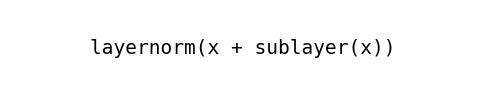

In [5]:
# Fórmula
formula = 'layernorm(x + sublayer(x))'

# Plot
plt.figure(figsize = (6, 1))
plt.text(0.5, 0.5, formula, fontsize = 14, ha = 'center', va = 'center', family = 'monospace')
plt.axis('off')
plt.show()

<img src="imagens/transformer_imagem31.png" alt="DSA" style="width: 700px;"/>

<img src="imagens/transformer_imagem29.png" alt="DSA" style="width: 470px;"/>

A fórmula acima é uma operação típica dentro de um bloco de uma arquitetura Transformer, especificamente dentro de uma das muitas camadas de atenção ou subcamadas de rede neural feed-forward. Aqui está a explicação do que essa operação faz:

**layernorm**: Isto se refere à normalização de camada, uma técnica de normalização que é aplicada a vetores de ativação dentro da rede. Normalizar os dados em cada camada ajuda a estabilizar a aprendizagem e permite que o modelo treine mais rapidamente e de forma mais estável.

**x**: Representa o vetor de entrada para a subcamada atual da rede neural. No contexto de uma arquitetura Transformer, 'x' poderia ser a saída de uma subcamada anterior, como a saída de uma camada de atenção.

**sublayer(x)**: Esta é uma função que realiza alguma operação sobre o vetor de entrada 'x'. Dependendo do contexto, 'sublayer' pode ser uma camada de atenção, uma camada de feedforward, ou qualquer outra transformação aplicada aos dados. Em um Transformer, por exemplo, isso poderia ser uma operação de atenção ou uma rede neural feedforward posicional.

**x + sublayer(x)**: Isso é uma aplicação de "residual connection" ou "skip connection". Aqui, a saída da subcamada é somada ao vetor de entrada original. Essas conexões residuais são fundamentais para permitir que as redes treinem efetivamente em muitas camadas, pois ajudam a mitigar o problema do desaparecimento ou da explosão dos gradientes, problema comum em outras arquiteturas de Deep Learning para PLN, como RNNs e LSTMs, por exemplo.

**layernorm(x + sublayer(x))**: Após a soma do vetor de entrada original com a saída da subcamada, a normalização de camada é aplicada. O resultado é um vetor de saída normalizado que será enviado para a próxima subcamada ou para a próxima camada da rede.

Essa fórmula descreve o processo de passar uma entrada 'x' através de uma subcamada (como atenção ou uma rede feed-forward), somar a saída desta subcamada à entrada original, e então normalizar o resultado. Este padrão é uma parte essencial da arquitetura Transformer, permitindo que o modelo efetivamente "lembre-se" da entrada original enquanto adiciona novas informações processadas através das subcamadas.

A normalização é boa para o modelo. Reduz o tempo de treinamento, torna o modelo imparcial para recursos de maior valor e não permite que os gradientes dos pesos explodam ou desapareçam, restringindo-os a uma determinada faixa. Resumindo, é indesejável treinar um modelo com gradiente descendente com recursos não normalizados. Portanto, precisamos da nomalização. Precisamos agora decidir qual tipo de normalização usar.

<img src="imagens/transformer_imagem30.png" alt="DSA" style="width: 470px;"/>

Em batch normalization, pegamos todas as sentenças em um lote e, para cada atributo nessas sentenças, calculamos uma média e uma variância, que serão usadas para normalizar os dados nesse atributo. E então normalizamos os dados para que a média fique próxima de zero e a variância seja próxima de um. Claro, devemos repetir isso também para todos os recursos dos dados de entrada.

Em layer normalization, calculamos a média e a variância de todas as características de uma única frase. Aqui não nos importamos com o fato de que as sentenças sejam do mesmo lote ou não. Para obter a média e a variância, simplesmente usamos todos os recursos de cada frase.

A normalização de camada foi inicialmente planejada para ser usada em redes neurais recorrentes porque o resultado da normalização de lote depende do tamanho do minilote. Os desenvolvedores da arquitetura Transformer a escolheram como método preferido de normalização em todo o modelo porque ela tem um desempenho excepcionalmente bom, especialmente em tarefas de PLN.

## Representação Visual do Multi-head Attention

O Transformer chama cada processador de Atenção de "Cabeça de Atenção" e o repete várias vezes em paralelo. Isso é conhecido como atenção multicabeça (ou Multi-head Attention). 

<img src="imagens/transformer_imagem22.png" alt="DSA" style="width: 500px;"/>

A consulta, a chave e o valor são passados cada um por camadas lineares separadas, cada uma com seus próprios pesos, produzindo três resultados chamados Q, K e V, respectivamente. Eles são então combinados usando a fórmula de Atenção mostrada abaixo, para produzir a Pontuação de Atenção.

<img src="imagens/transformer_imagem21.png" style="width: 350px;"/>

<img src="imagens/transformer_imagem23.png"  style="width: 500px;"/>

O importante a perceber aqui é que os valores Q, K e V carregam uma representação codificada de cada palavra na sequência. Os cálculos de Autoatenção combinam cada palavra com todas as outras palavras na sequência, de modo que a Pontuação de Atenção codifique uma pontuação para cada palavra na sequência.

Ao discutir o decodificador há pouco, mencionamos brevemente o mascaramento. A Máscara também é mostrada nos diagramas de Atenção acima. Vamos ver como isso funciona.

## Máscaras de Atenção

Ao calcular a pontuação de atenção, o módulo de Atenção implementa uma etapa de mascaramento. O mascaramento serve a dois propósitos:

1- No Codificador Autoatenção e no Codificador-Decodificador-atenção: 

O mascaramento serve para zerar as saídas de atenção onde há preenchimento nas sentenças de entrada, para garantir que o preenchimento não contribua para a Autoatenção. (Observação: como as sequências de entrada podem ter comprimentos diferentes, elas são estendidas com tokens de preenchimento, como na maioria dos modelos de PLN, para que vetores de comprimento fixo possam ser inseridos no Transformer).

2- No Decodificador Autoatenção: 

O mascaramento serve para evitar que o decodificador ‘veja’ o resto da frase alvo ao prever a próxima palavra.

O decodificador processa palavras na sequência de origem e as utiliza para prever as palavras na sequência de destino. Durante o treinamento, isso é feito via Teacher Forcing, onde a sequência alvo completa é alimentada como entradas do decodificador. Portanto, ao prever uma palavra em uma determinada posição, o decodificador tem à sua disposição as palavras-alvo que precedem essa palavra, bem como as palavras-alvo que seguem essa palavra. Isso permite que o decodificador “trapaceie” usando palavras-alvo de “etapas de tempo” futuras.

Por exemplo, ao prever a ‘Word 3’, o decodificador deve referir-se apenas às 3 primeiras palavras de entrada do alvo, mas não à quarta palavra ‘IA’.

<img src="imagens/transformer_imagem24.png"  style="width: 500px;"/>

Portanto, o Decodificador mascara as palavras de entrada que aparecem posteriormente na sequência.

Ao calcular a pontuação de atenção, o mascaramento é aplicado ao numerador logo antes do Softmax. Os elementos mascarados são definidos como infinito negativo, de modo que Softmax transforma esses valores em zero.

<img src="imagens/transformer_imagem25.png" style="width: 500px;"/>

## Processo de Geração da Saída do Modelo

O último decodificador da pilha passa sua saída para o componente Output, que a converte na sentença de saída final.

A camada Linear projeta o vetor Decodificador em Pontuações de Palavras, com um valor de pontuação para cada palavra única no vocabulário alvo, em cada posição da frase. 

Por exemplo, se nossa frase final tiver 7 palavras e o vocabulário alvo tiver 10.000 palavras únicas, geramos 10.000 valores de pontuação para cada uma dessas 7 palavras. Os valores da pontuação indicam a probabilidade de ocorrência de cada palavra do vocabulário naquela posição da frase.

Isso ajuda a explicar porque um grande modelo de linguagem (LLM) pode ter bilhões de parâmetros.

A camada Softmax então transforma essas pontuações em probabilidades (valores entre 0 e 1). Em cada posição, encontramos o índice da palavra com maior probabilidade e, em seguida, mapeamos esse índice para a palavra correspondente no vocabulário. Essas palavras formam então a sequência de saída do Transformer.

<img src="imagens/transformer_imagem26.png" style="width: 500px;"/>

## Função de Erro

Durante o treinamento, usamos uma função de perda, como perda de entropia cruzada, para comparar a distribuição de probabilidade de saída gerada com a sequência alvo. A distribuição de probabilidade fornece a probabilidade de cada palavra ocorrer naquela posição.

<img src="imagens/transformer_imagem27.png" style="width: 500px;"/>

Vamos supor que nosso vocabulário alvo contenha apenas quatro palavras. Nosso objetivo é produzir uma distribuição de probabilidade que corresponda à nossa sequência alvo esperada “De nada END”.

Isso significa que a distribuição de probabilidade para a primeira posição da palavra deve ter uma probabilidade de 1 para “De”, com probabilidades para todas as outras palavras do vocabulário sendo 0. Da mesma forma, “nada” e “END” devem ter uma probabilidade de 1 para a segunda e terceira posições de palavras, respectivamente.

Como de costume, a perda é usada para calcular gradientes para treinar o Transformer por meio de retropropagação. Aqui o processo é o mesmo que outras arquiteturas de Deep Learning.

## Conclusão

Agora, esta imagem deve fazer bem mais sentido:

<img src="imagens/transformer_imagem28.png" style="width: 370px;"/>